### Connexion de Google Drive

In [45]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/journaux-xix-siecle/main
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/journaux-xix-siecle/main


### Téléchargement

In [46]:
!pip install networkx[default]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import

In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import json

### Fonctions

In [48]:
def creagraphe(L):
    test = set()
    a = {}
    G = nx.Graph()
    for i in range(len(L)):
        if L[i] not in test:
            test.add(L[i])
            a[L[i]] = 1
            for j in (L[(i+1):]):
                if L[i] != j:
                    G.add_edge(L[i], j, weight=1)
        else:
            a[L[i]] += 1
    return G

def fusiono(G1,G2):

    A = nx.compose(G1,G2)
    for i in G1.adj.keys():
        if i in G2.adj.keys():
            for j in G2.adj[i]:
                if j in G1.adj[i]:
                    p = G1.adj[i][j]["weight"] + G2.adj[i][j]["weight"]
                    A.add_edge(i, j, weight=p)
    return A

def aficho(G):
    
    e9 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 9]
    e8 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 9]
    e7 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 8]
    e6 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 7]
    e5 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 6]
    e4 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 5]
    e3 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 4]
    e2 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 3]
    e1 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 2]
    e0 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 1]

    pos = nx.spring_layout(G,seed=5)
    
    nx.draw_networkx_nodes(G, pos, node_size=20)

    nx.draw_networkx_edges(G, pos, edgelist=e0, width=0.25, edge_color="black")
    nx.draw_networkx_edges(G, pos, edgelist=e1, width=1.25, edge_color="red")
    nx.draw_networkx_edges(G, pos, edgelist=e2, width=2.25, edge_color="blue")
    nx.draw_networkx_edges(G, pos, edgelist=e3, width=3.25, edge_color="purple")
    nx.draw_networkx_edges(G, pos, edgelist=e4, width=4.25)
    nx.draw_networkx_edges(G, pos, edgelist=e5, width=5.25)
    nx.draw_networkx_edges(G, pos, edgelist=e6, width=6.25)
    nx.draw_networkx_edges(G, pos, edgelist=e7, width=7.25)
    nx.draw_networkx_edges(G, pos, edgelist=e8, width=8.25)
    nx.draw_networkx_edges(G, pos, edgelist=e9, width=9.25, alpha=0.5, edge_color="b") # style="dashed"

    nx.draw_networkx_labels(G, pos, font_size=0.1, font_family="sans-serif")

    edge_labels = nx.get_edge_attributes(G, "weight")
    #nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    plt.axis("off")
    plt.tight_layout()
    plt.show()


def savo(G):
    
    e9 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 9]
    e8 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 9]
    e7 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 8]
    e6 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 7]
    e5 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 6]
    e4 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 5]
    e3 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 4]
    e2 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 3]
    e1 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 2]
    e0 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 1]

    pos = nx.spring_layout(G,seed=5)
    
    nx.draw_networkx_nodes(G, pos, node_size=20)

    nx.draw_networkx_edges(G, pos, edgelist=e0, width=0.25, edge_color="black")
    nx.draw_networkx_edges(G, pos, edgelist=e1, width=1.25, edge_color="red")
    nx.draw_networkx_edges(G, pos, edgelist=e2, width=2.25, edge_color="blue")
    nx.draw_networkx_edges(G, pos, edgelist=e3, width=3.25, edge_color="purple")
    nx.draw_networkx_edges(G, pos, edgelist=e4, width=4.25)
    nx.draw_networkx_edges(G, pos, edgelist=e5, width=5.25)
    nx.draw_networkx_edges(G, pos, edgelist=e6, width=6.25)
    nx.draw_networkx_edges(G, pos, edgelist=e7, width=7.25)
    nx.draw_networkx_edges(G, pos, edgelist=e8, width=8.25)
    nx.draw_networkx_edges(G, pos, edgelist=e9, width=9.25, alpha=0.5, edge_color="b") # style="dashed"

    nx.draw_networkx_labels(G, pos, font_size=0, font_family="sans-serif")

    edge_labels = nx.get_edge_attributes(G, "weight")
    #nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("result/Graph.jpg", format="JPG")

### Main

In [49]:
with open('result/noms.json') as d:
  noms = json.load(d)

In [50]:
pile = []
for key in noms:
  g = creagraphe(noms[key]['nom'])
  pile.append(g)
  if len(pile) >= 2:
    g2 = pile.pop()
    g1 = pile.pop()
    g = fusiono(g1, g2)
    pile.append(g)

graph = pile.pop()

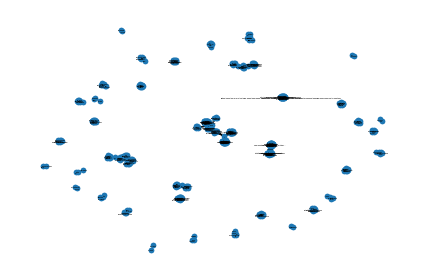

In [51]:
savo(graph)
aficho(graph)